# Common Probability Distributions

## Introduction

This notebook includes the density or mass functions of common probability distributions, as well as their density plots/histograms given different parameter values.

Some example usages of distributions are based on Heiner (2017).

Examples of mixtures are based on Rodriguez (2020), with modifications.

In [1]:
# loads packages

library(magrittr) # makes some codes more readable
library(nimble) # needs for double exponential distribution

nimble version 0.12.1 is loaded.
For more information on NIMBLE and a User Manual,
please visit https://R-nimble.org.


Attaching package: ‘nimble’


The following object is masked from ‘package:stats’:

    simulate




In [2]:
# set-up

set.seed(42)

n<-100000

## Continuous

### Normal

The normal distribution takes two parameters, mean $\mu$ and variance $\sigma^2$:

$$
X \sim \text{N}(\mu, \sigma^2)
$$

$$
f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp(-\frac{(x - \mu)^2}{2 \sigma^2})
$$

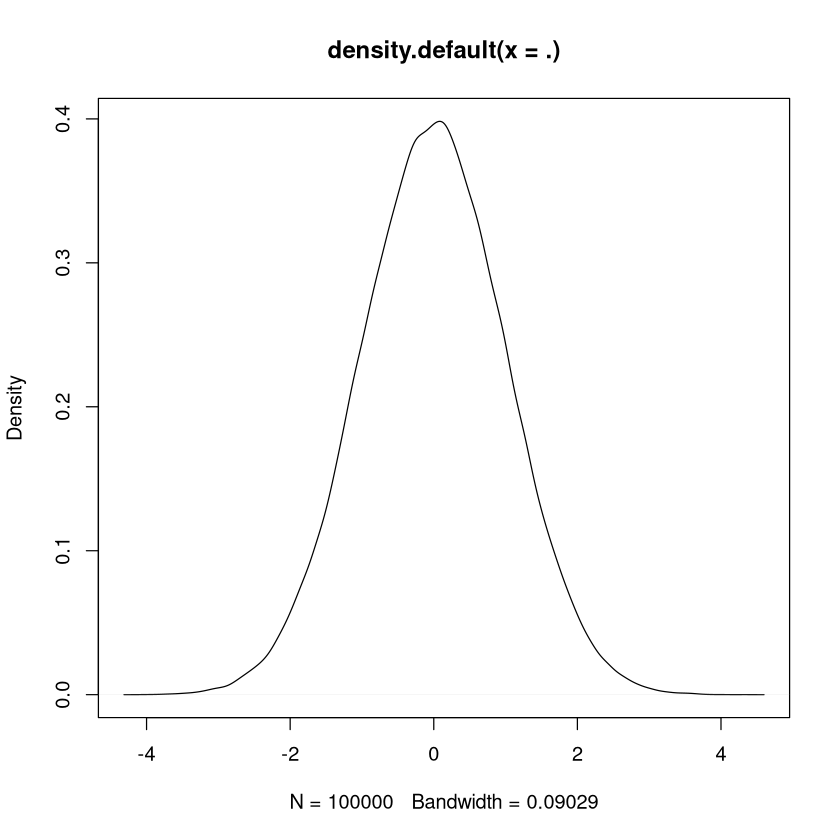

In [3]:
rnorm(n, 0, 1) %>% density %>% plot # note that rnorm() takes sd instead of variance

It is obviously not very interesting to plot normal distributions, so only $\mu=0$ and $\sigma^2=\sigma=1$ was plotted.

### t

The t-distribution resembles the normal distribution but with thicker tails.

This distribution takes one parameter which is degrees of freedom $\upsilon= n - 1$:

$$
Y \sim t_\upsilon
$$

$$
f(y) =
\frac{\Gamma(\frac{\upsilon+1}{2})}{\Gamma(\frac{\upsilon}{2}) \sqrt{\upsilon \pi}} (1+ \frac{y^2}{\upsilon})^{-(\frac{\upsilon+1}{2})}
$$

As shown below, the t-distribution is more similar to a standard normal distribution as $\upsilon$ increases.

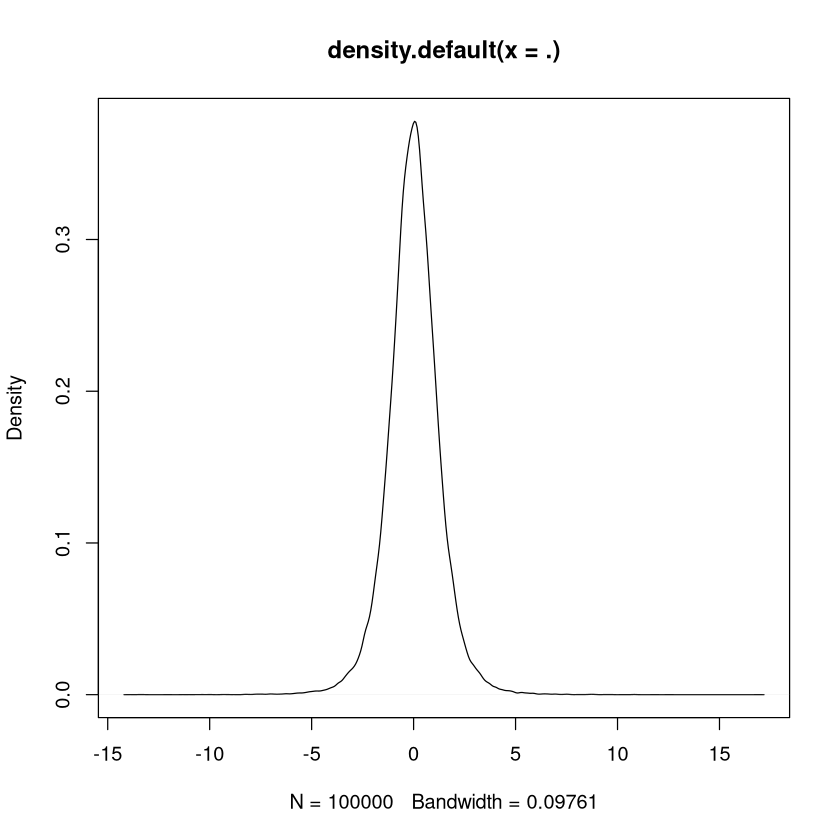

In [4]:
rt(n, df=5) %>% density %>% plot

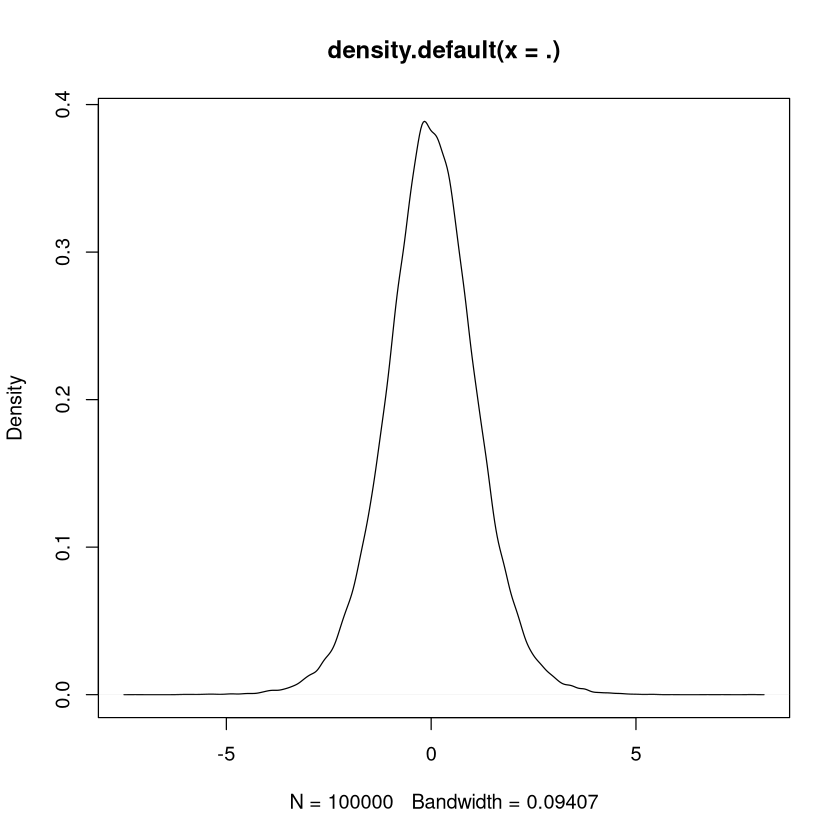

In [5]:
rt(n, df=10) %>% density %>% plot

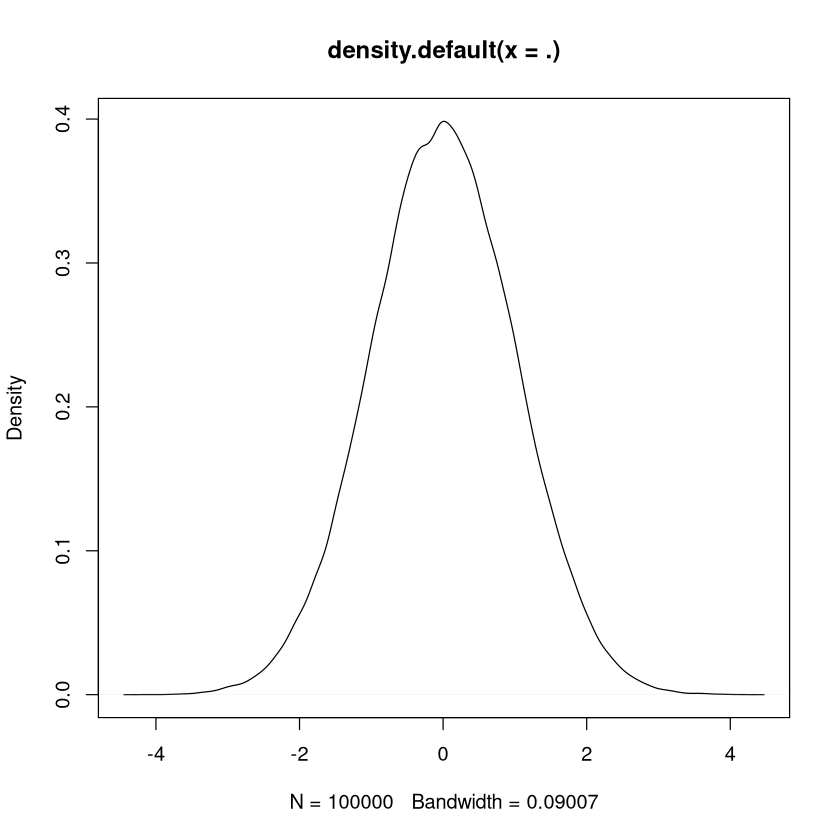

In [6]:
rt(n, df=Inf) %>% density %>% plot

### Beta

The beta distribution is bounded between 0 and 1, therefore is useful to model probabilities.

This distribution takes two shape parameters, $\alpha$ and $\beta$.

$$
X \sim \text{Beta}(\alpha, \beta)
$$

$$
f(x | \alpha, \beta) =
\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} x^{\alpha - 1} (1-x)^{\beta-1} I_{\{0 < x < 1 \}} (x)
$$

where $\Gamma(n) = (n-1)!$

As shown below, the beta distribution does not have a "standard" shape.

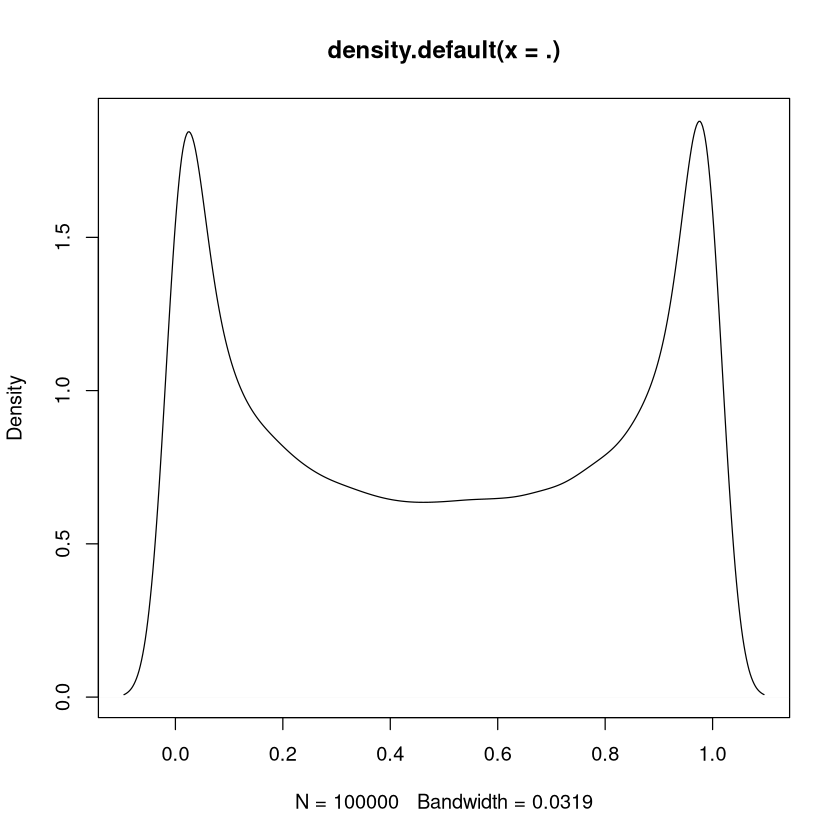

In [7]:
rbeta(n, .5, .5) %>% density %>% plot

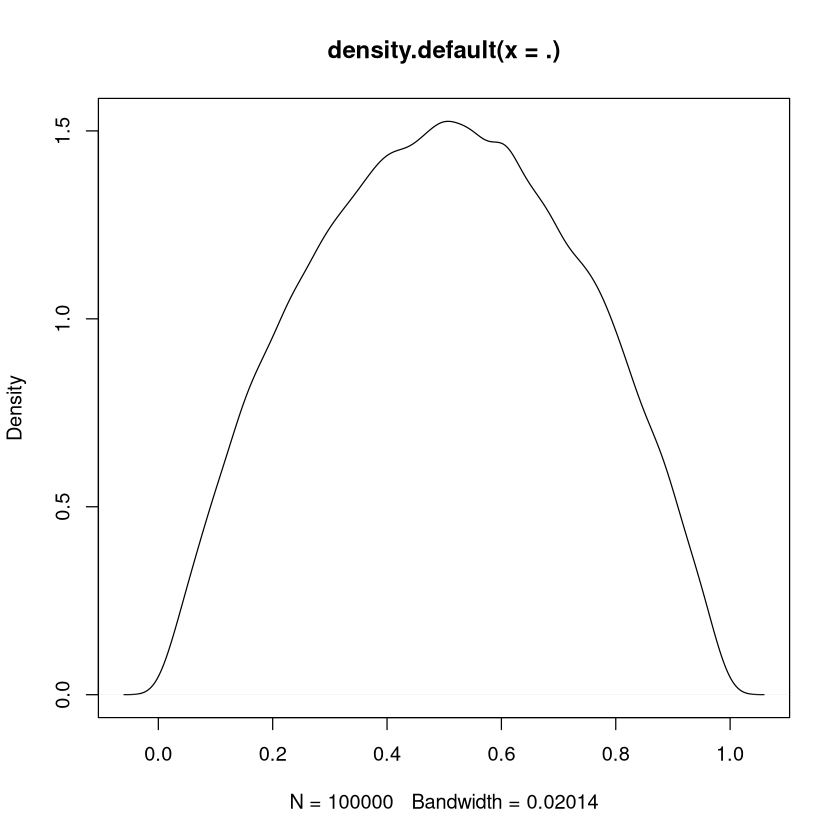

In [8]:
rbeta(n, 2, 2) %>% density %>% plot

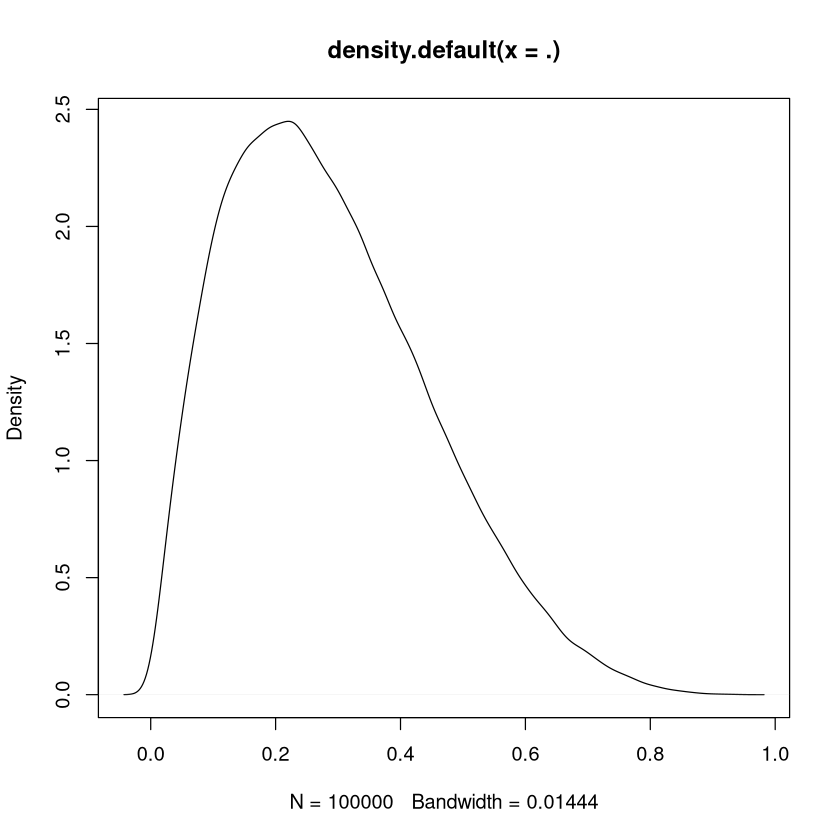

In [9]:
rbeta(n, 2, 5) %>% density %>% plot

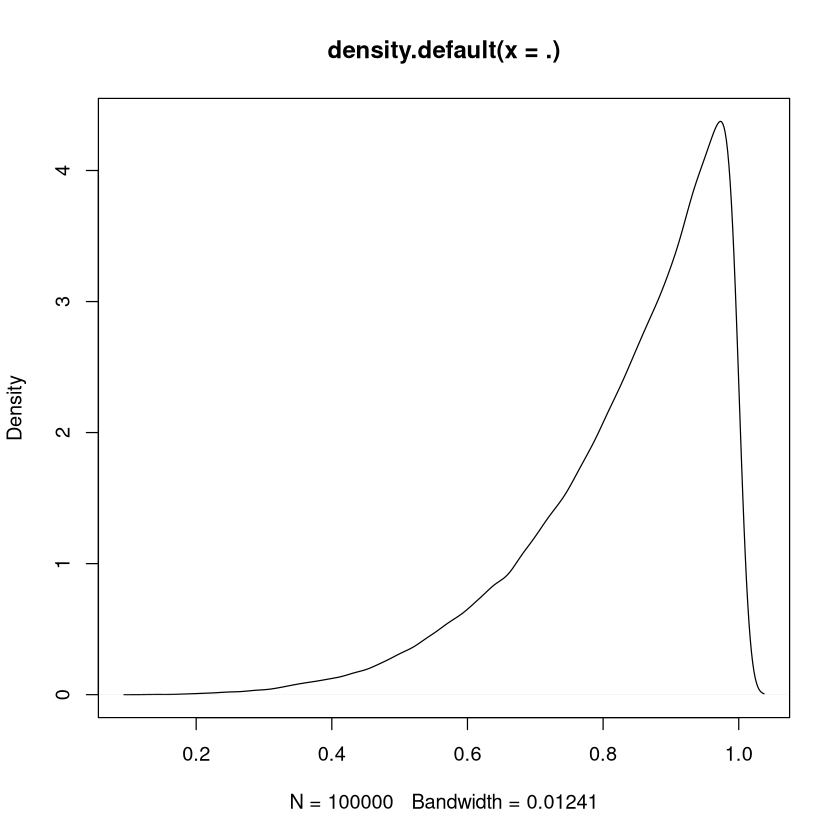

In [10]:
rbeta(n, 5, 1) %>% density %>% plot

In [ ]:
rbeta(n, 1, 3) %>% density %>% plot

Finally, $\alpha = \beta = 1$ is $\text{Uniform}(0, 1)$.

In [ ]:
rbeta(n, 1, 1) %>% density %>% plot

### Exponential

The exponential distribution is commonly used to model waiting time between random events.

This distribution takes one rate parameter, $\lambda$ which is the expected (average) number of occurrence.

$$
X \sim \text{Exp}(\lambda)
$$

$$
f(x | \lambda) = \lambda e^{-\lambda x} I_{\{x \geq 0\}} (x)
$$

As $\lambda$ increases, the distribution increasingly concentrates around smaller values. That is, the waiting time decreases when the expected number of occurrence increases.

In [ ]:
rexp(n, 1) %>% density %>% plot

In [ ]:
rexp(n, 10) %>% density %>% plot

In [ ]:
rexp(n, 100) %>% density %>% plot

### Double Exponential

Also known as the Laplace distribution, the double exponential distribution resembles a pair of back-to-back exponential distributions. It is used for a random variable which can be positive or negative with a single peak.

This distribution takes two parameters, location $\mu$ and scale $\tau$.

$$
X \sim \text{DExp}(\mu, \tau)
$$

$$
f(x | \mu, \tau) =
\frac{\tau}{2} e^{-\tau |x-\mu|}
$$

The mean of a double exponential distribution is naturally $\mu$.

Given $\mu = 0$, this distribution concentrates at 0. Therefore, it is commonly used as priors in Bayesian parameter estimation when the parameters are believed to be 0.

In [ ]:
rdexp(n, 0, 1) %>% density %>% plot

In [ ]:
rdexp(n, 0, 10) %>% density %>% plot

In [ ]:
rdexp(n, 5, 1) %>% density %>% plot

### Gamma

The gamma distribution is in fact a family of mostly right-skewed distributions which model positive-valued and continuous random variables.

In its general form, the gamma distribution takes two parameters, shape $\alpha$ and rate $\beta$:

$$
Y \sim \text{Gamma}(\alpha, \beta)
$$

$$
f(y | \alpha, \beta) =
\frac{\beta^\alpha}{\Gamma(\alpha)} y^{\alpha-1} e^{-\beta y} I_{\{y \geq 0 \}} (y)
$$

where $\Gamma(n) = (n-1)!$

In [ ]:
rgamma(n, 2, 2) %>% density %>% plot

In [ ]:
rgamma(n, 5, 1) %>% density %>% plot

As $\alpha$ increases, the gamma distribution increasingly resembles the normal distribution.

In [ ]:
rgamma(n, 15, 5) %>% density %>% plot

In [ ]:
rgamma(n, 100, 5) %>% density %>% plot

On the other hand, the exponential distribution is a special case of the gamma distribution with $\alpha = 1$.

In [ ]:
rgamma(n, 1, 2) %>% density %>% plot

In [ ]:
rgamma(n, 1, 100) %>% density %>% plot

## Discrete

### Binomial

The binomial distribution models the number of successes in $n$ independent Bernoulli trials.

Given $X_1, ..., X_n$ independent $\text{Bernoulli}(p)$ random variables, $Y=\sum^n_{i=1} X_i$ is binomial distributed.

This distribution takes two parameters, $n$ and the probability of success in a trial $p$.

$$
Y \sim \text{Binom}(n, p)
$$

$$
P(Y=y | n, p) =
{n \choose y} p^y (1-p)^{n-y}, y = 0, 1, ..., n
$$

where ${n \choose y} = \frac{n!}{y!(n-y)!}$

The mean of a binomial distribution is $np$, which is the number of trials times the probability of success in a trial.

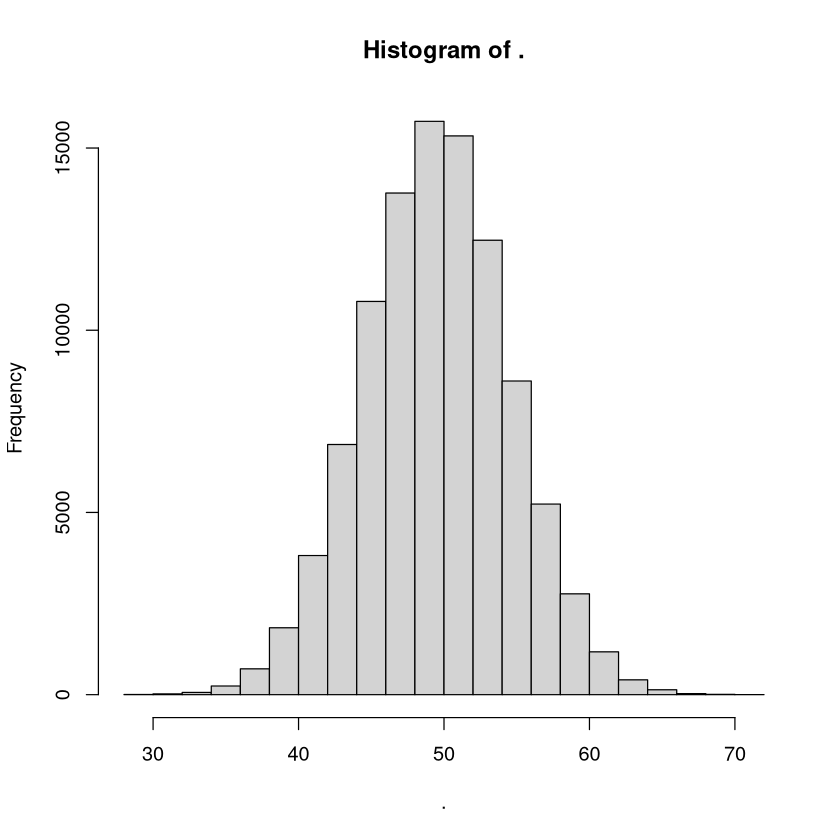

In [25]:
rbinom(n, 100, .5) %>% hist

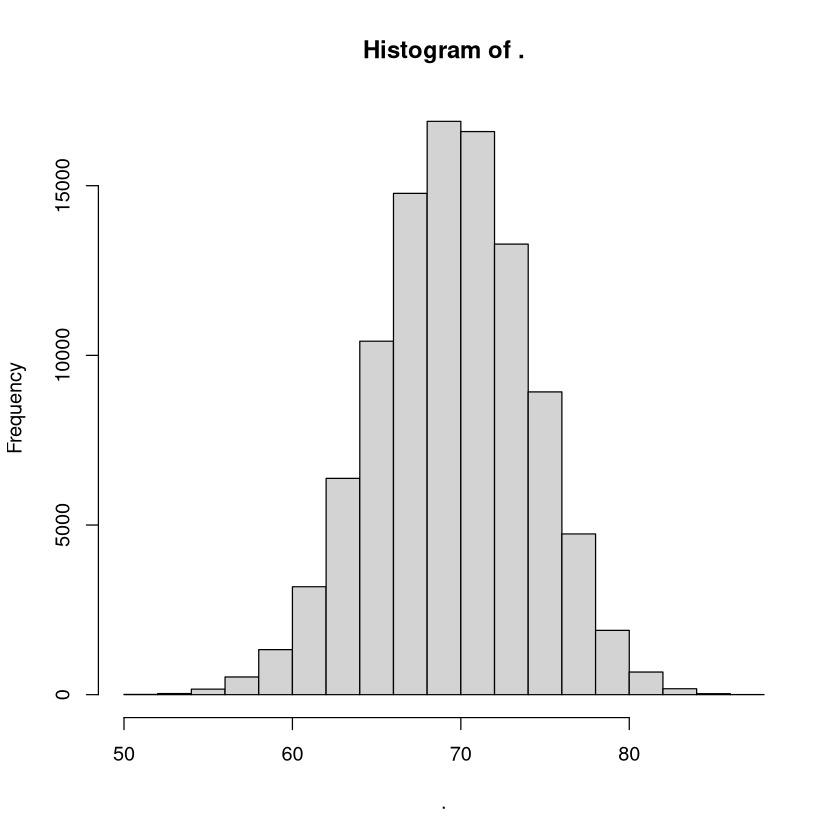

In [26]:
rbinom(n, 100, .7) %>% hist

### Poisson

The Poisson distribution is commonly used to model the number of an event occurring in a time interval.

Similar to the exponential distribution, this distribution takes one rate parameter, $\lambda$ which is the expected (average) number of occurrence.

$$
X \sim \text{Pois}(\lambda)
$$

$$
P(X=x | \lambda) =
\frac{\lambda^x \exp(-\lambda)}{x!} , x = 0, 1, ...
$$

The mean of a Poisson distribution is $\lambda$, since it is the expectation.

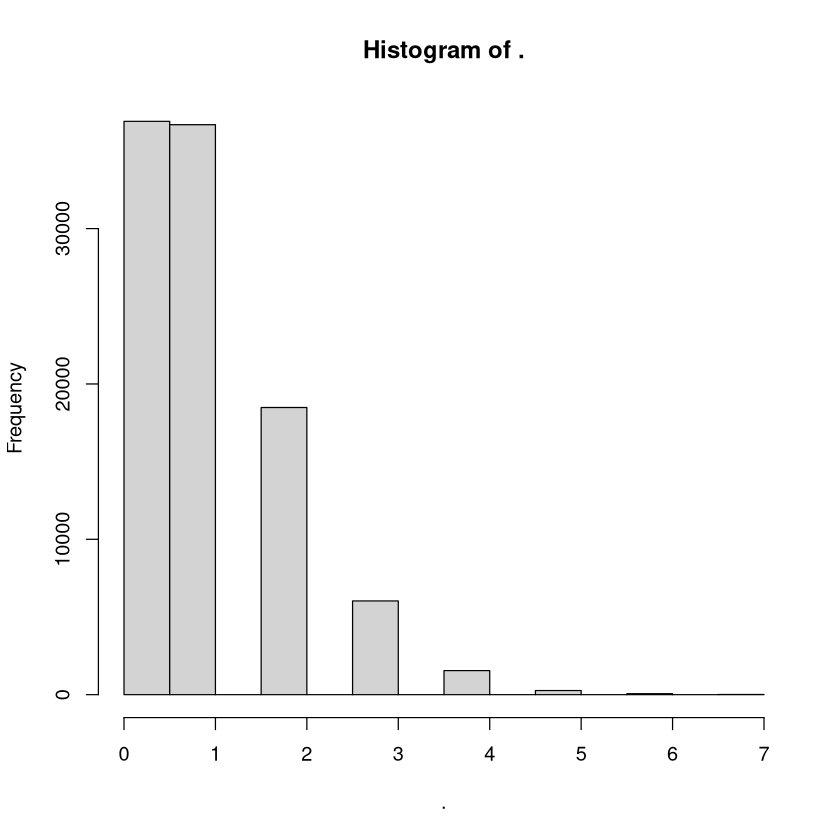

In [27]:
rpois(n, 1) %>% hist

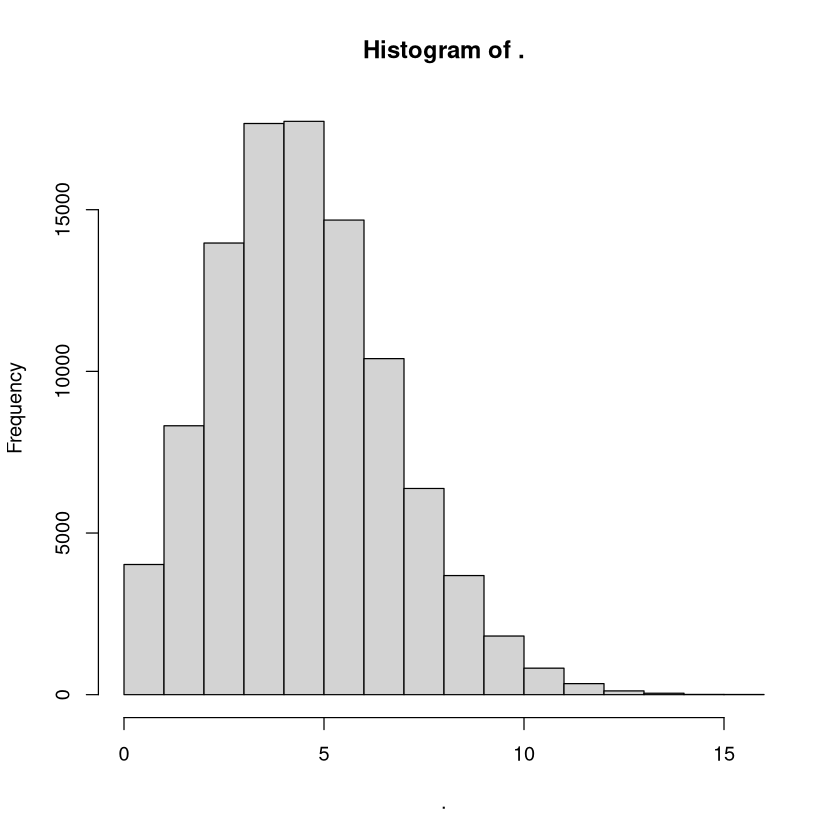

In [28]:
rpois(n, 5) %>% hist

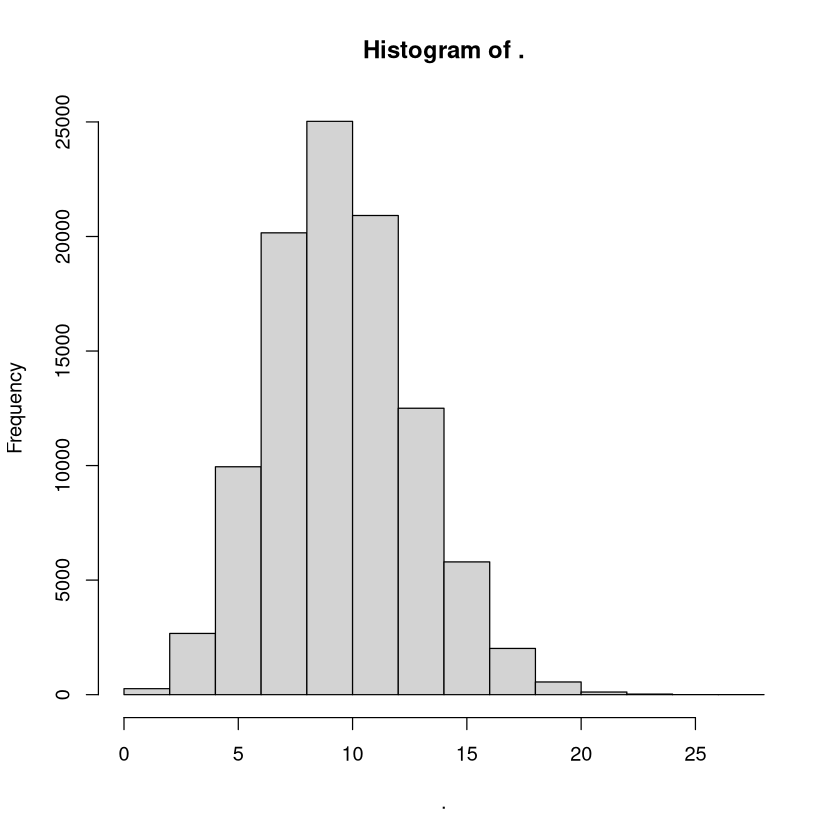

In [29]:
rpois(n, 10) %>% hist

### Negative Binomial

The negative binomial distribution models the number of failures before achieving the $r$th success.

This distribution takes two parameters, $r$ and the probability of success in a trial $p$.

$$
Y \sim \text{NegBinom}(r, p)
$$

$$
P(Y = y | r, p) =
{r+y-1 \choose y} p^r (1-p)^y, y = 0, 1, ...
$$

As $p$ increases, the distribution increasingly concentrates around small values. That is, when the probability of success in a trials increases, the number of failures which will occur before the $r$th success decreases.

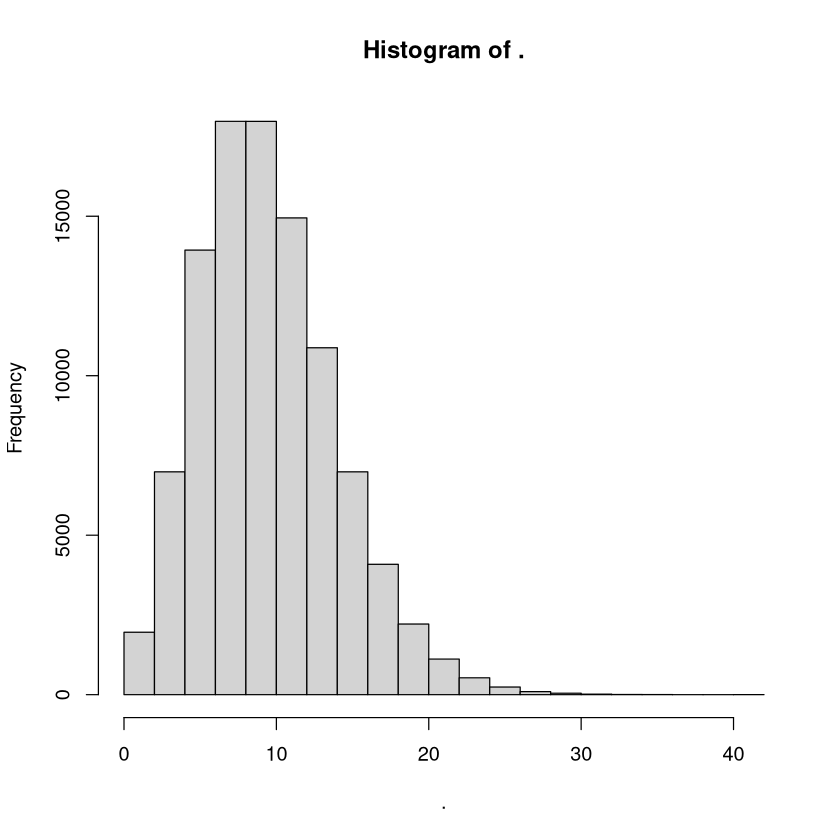

In [30]:
rnbinom(n, 10, .5) %>% hist

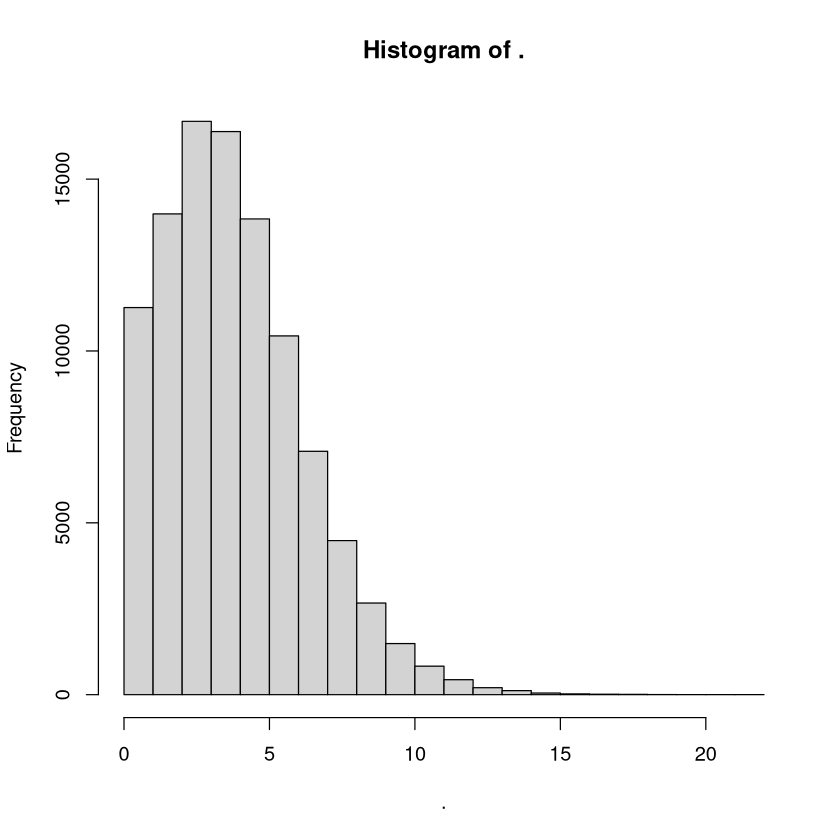

In [31]:
rnbinom(n, 10, .7) %>% hist

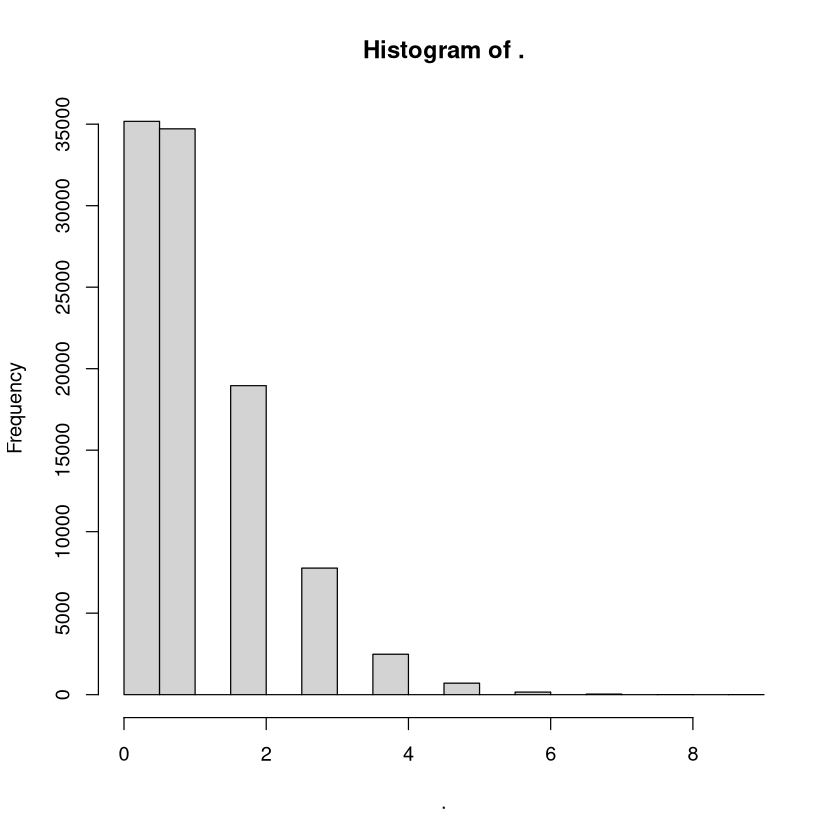

In [32]:
rnbinom(n, 10, .9) %>% hist

Further, the negative binomial distribution can be used as an alternative to the Poisson distribution when modelling counts, since the negative binomial distribution allows the mean and the variance to be different.

## Mixtures of Distributions

Weighted combinations of probability distributions can be used to account for non-standard distributions.

### An Example

Consider a mixture of two normal distributions:

$$
p(y) =
\omega_1 \frac{1}{\sqrt{2 \pi \sigma_1^2}} \exp(-\frac{(y - \mu_1)^2}{2 \sigma_1^2}) +
\omega_2 \frac{1}{\sqrt{2 \pi \sigma_2^2}} \exp(-\frac{(y - \mu_2)^2}{2 \sigma_2^2})
$$

where $\omega$ are weights of the two distributions.

$\omega_1 = 0.6$, $\mu_1 = 0$, $\sigma_1^2 = 1$, $\omega_2 = 0.4$, $\mu_2 = 5$, and $\sigma_2^2 = 4$ will give a bimodal distribution:

In [33]:
y_1<-rnorm(n*.6, 0, 1)
y_2<-rnorm(n*.4, 5, 2)

y<-c(y_1, y_2) %>% sample # sample() shuffles the vector, doesn't really matter for plotting

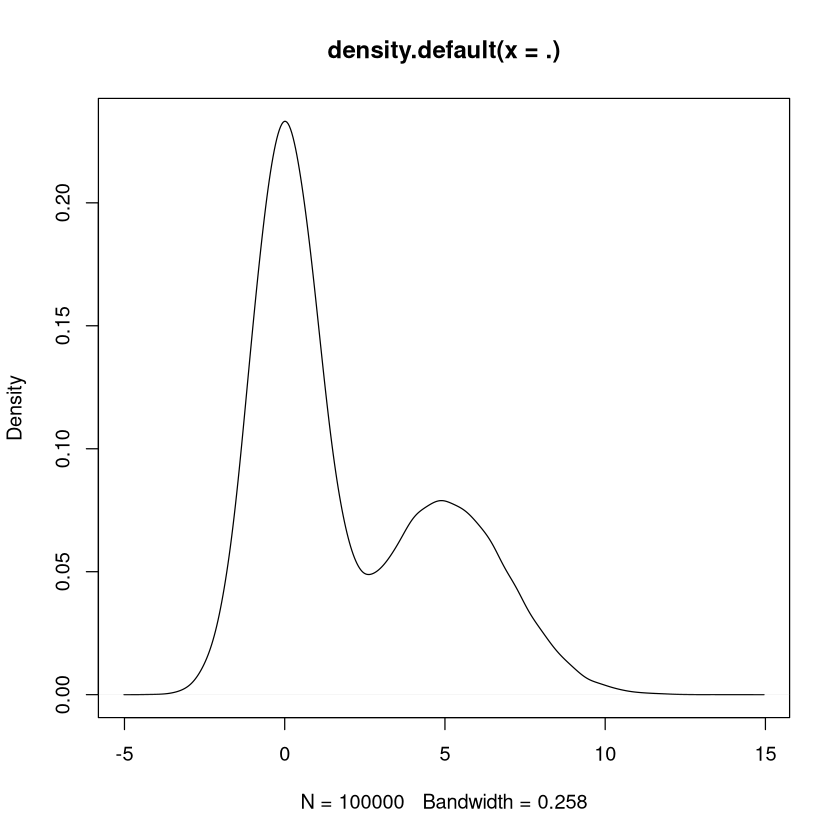

In [34]:
y %>% density %>% plot

$\omega_1 = 0.55$, $\mu_1 = 0$, $\sigma_1^2 = 2$, $\omega_2 = 0.45$, $\mu_2 = 3$, and $\sigma_2^2 = 16$ will give a skewed unimodal distribution:

In [35]:
y_1<-rnorm(n*.55, 0, sqrt(2))
y_2<-rnorm(n*.45, 3, 4)

y<-c(y_1, y_2) %>% sample

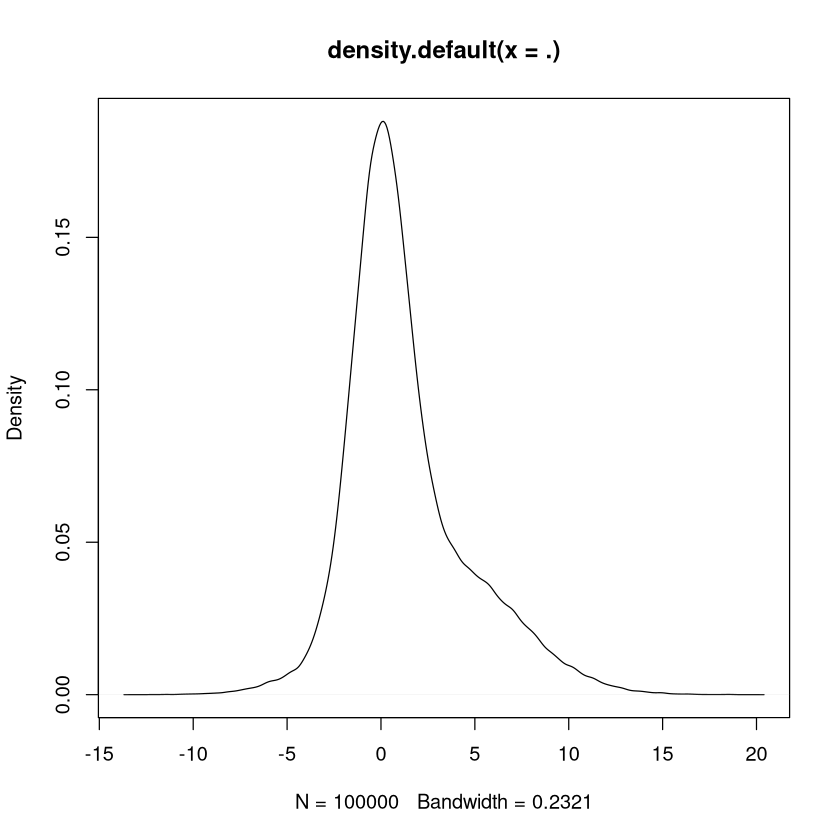

In [36]:
y %>% density %>% plot

### Another Example

Consider a negative binomial distribution which is zero-inflated:

$$
p(y) =
\omega_1 (0) + \omega_2 {r+y-1 \choose y} p^r (1-p)^y
$$

For $\omega_1 = 0.4$, $\omega_2 = 0.6$, $r = 10$, and $p = 0.6$: 

In [37]:
y_1<-rep(0, n*.4)
y_2<-rnbinom(n*.6, 10, .6)

y<-c(y_1, y_2)

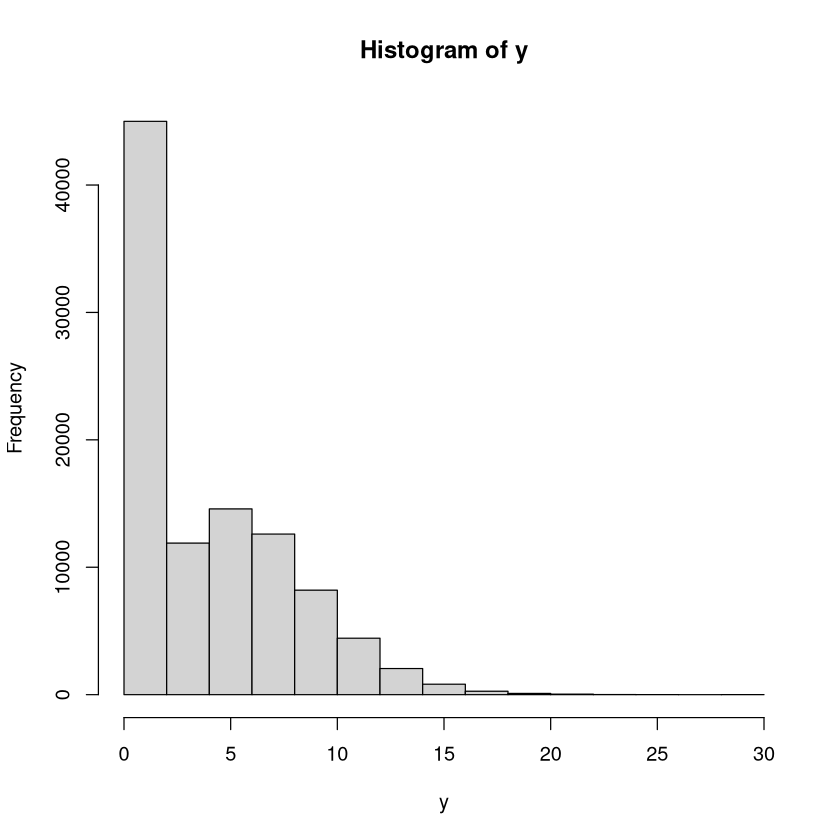

In [38]:
hist(y)